In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv("/home/admin1/Downloads/Food-Truck(For Linear Regression Program).csv")
df

,xlabel,ylabel
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


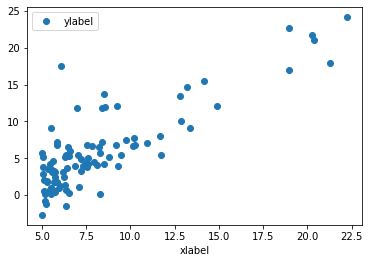

In [47]:
df.plot(x="xlabel", y="ylabel", style="o")
plt.show()

In [48]:
x_mean = df["xlabel"].mean()
y_mean = df["ylabel"].mean()
print(x_mean, y_mean)

8.159799999999999 5.839135051546393


In [49]:
df["x"] = df["xlabel"] - x_mean
df["y"] = df["ylabel"] - y_mean
df["x*y"] = df["x"] * df["y"]
df["x^2"] = df["x"]**2
df["y^2"] = df["y"]**2
df

,xlabel,ylabel,x,y,x*y,x^2,y^2
0,6.1101,17.59200,-2.0497,11.752865,-24.089847,4.201270,138.129834
1,5.5277,9.13020,-2.6321,3.291065,-8.662412,6.927950,10.831108
2,8.5186,13.66200,0.3588,7.822865,2.806844,0.128737,61.197216
3,7.0032,11.85400,-1.1566,6.014865,-6.956793,1.337724,36.178600
4,5.8598,6.82330,-2.3000,0.984165,-2.263579,5.290000,0.968581
...,...,...,...,...,...,...,...
92,5.8707,7.20290,-2.2891,1.363765,-3.121794,5.239979,1.859855
93,5.3054,1.98690,-2.8544,-3.852235,10.995820,8.147599,14.839715
94,8.2934,0.14454,0.1336,-5.694595,-0.760798,0.017849,32.428413
95,13.3940,9.05510,5.2342,3.215965,16.833004,27.396850,10.342431


In [50]:
summation_x_y = df["x*y"].sum()
summation_x_squared = df["x^2"].sum()
summation_y_squared = df["y^2"].sum()
print(summation_x_y, summation_x_squared, summation_y_squared)

1715.219528539 1437.69585786 2914.8470516572247


In [51]:
correlation = summation_x_y / (summation_x_squared * summation_y_squared)**0.5
correlation

0.8378732325263409

In [55]:
def getMean(numbers):
    if len(numbers) == 0:
        return None
    else:
        current_sum = 0
        for i in numbers:
            current_sum += i
            current_avg = current_sum/len(numbers)
        return current_avg

In [56]:
def getStandardDeviation(numbers):
    if len(numbers) == 0:
        return 0
    else:
        mean = getMean(numbers)
        std_deviation = 0
        for i in numbers:
            std_deviation += (i - mean)**2
        return (std_deviation/len(numbers))**0.5

In [57]:
std_deviation_x = getStandardDeviation(df["x"].tolist())
std_deviation_y = getStandardDeviation(df["y"].tolist())
print(std_deviation_x, std_deviation_y)

3.8498839959227156 5.48178525707763


In [58]:
m = correlation * (std_deviation_y / std_deviation_x)
m

1.1930336441895937

In [59]:
c = df["ylabel"].mean() - m * df["xlabel"].mean()
c

-3.895780878311852

In [60]:
df["y_prediction"] = m * df["xlabel"] + c
df

,xlabel,ylabel,x,y,x*y,x^2,y^2,y_prediction
0,6.1101,17.59200,-2.0497,11.752865,-24.089847,4.201270,138.129834,3.393774
1,5.5277,9.13020,-2.6321,3.291065,-8.662412,6.927950,10.831108,2.698951
2,8.5186,13.66200,0.3588,7.822865,2.806844,0.128737,61.197216,6.267196
3,7.0032,11.85400,-1.1566,6.014865,-6.956793,1.337724,36.178600,4.459272
4,5.8598,6.82330,-2.3000,0.984165,-2.263579,5.290000,0.968581,3.095158
...,...,...,...,...,...,...,...,...
92,5.8707,7.20290,-2.2891,1.363765,-3.121794,5.239979,1.859855,3.108162
93,5.3054,1.98690,-2.8544,-3.852235,10.995820,8.147599,14.839715,2.433740
94,8.2934,0.14454,0.1336,-5.694595,-0.760798,0.017849,32.428413,5.998524
95,13.3940,9.05510,5.2342,3.215965,16.833004,27.396850,10.342431,12.083712


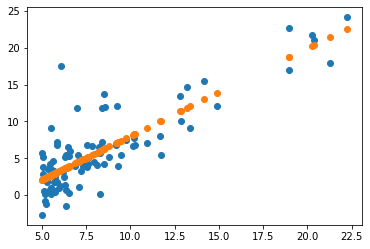

In [61]:
plot1 = plt.scatter(df["xlabel"], df["ylabel"])
plot2 = plt.scatter(df["xlabel"], df["y_prediction"])
plt.show()

In [62]:
correlation

0.8378732325263409

In [63]:
ssr=sum((df["y_prediction"]- y_mean)**2)
ssr

2046.3146047180405

In [64]:
sse=sum((df['ylabel']-df["y_prediction"])**2)
sse

868.5324469391843

In [65]:
tss=sum((df['ylabel']-y_mean)**2)
tss

2914.8470516572247

In [66]:
tss_new=sse+ssr
tss_new

2914.8470516572247

In [67]:
R_square= correlation**2
R_square

0.7020315537841398

In [70]:
cost= sse / 96
cost

9.047212988949836